In [93]:
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression

# 문제1

In [102]:
df0 = pd.read_csv("./nyc.csv")
df0.head(1)

,Case,Restaurant,Price,Food,Decor,Service,East
0,1,Daniella Ristorante,43,22,18,20,0


In [63]:
# 불필요값(Case), String값 제거
dfx = df.drop(["Case", "Price", "Restaurant"], axis=1)

In [64]:
dfx.head(1)

,Food,Decor,Service,East
0,22,18,20,0


In [65]:
# Scailing 하기
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
scaler.fit(dfx)
dfX = scaler.transform(dfx)

In [67]:
dfX = pd.DataFrame(dfX, columns = ["Food", "Decor", "Service", "East"])


In [68]:
# constant항 추가
dfX = sm.add_constant(dfX)

In [69]:
dfy = df["Price"]
dfy = pd.DataFrame(dfy)

In [89]:
# df 합치기 (Target=Price)
df = pd.concat([dfX, dfy], axis=1)
df.head(1)

,const,Food,Decor,Service,East,Price
0,1,0.710637,0.114864,0.285244,-1.307546,43


In [92]:
# model 작성 (from_formula)
import statsmodels.formula.api as smf

In [91]:
model = smf.ols(formula="Price~Food+Decor+Service+East", data=df)

In [87]:
result = model.fit()

In [88]:
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Mon, 13 Jun 2016   Prob (F-statistic):           5.35e-34
Time:                        00:37:00   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6964      0.443     96.448      0.0

## 문제1-1번 답:상기 Results를 보았을 때, Service 의 P>|t| 값이 0.995 이므로 가장 영향력이 작음

# 문제1-2번 문제 아래쪽

In [98]:
# anova table 그리기
table = sm.stats.anova_lm(result)

In [97]:
table

,df,sum_sq,mean_sq,F,PR(>F)
Food,1.0,5670.303110,5670.303110,172.226902,2.603243e-27
Decor,1.0,3223.672474,3223.672474,97.914187,2.251418e-18
Service,1.0,3.923858,3.923858,0.119181,7.303693e-01
East,1.0,157.096700,157.096700,4.771575,3.036163e-02
Residual,163.0,5366.521715,32.923446,NaN,NaN


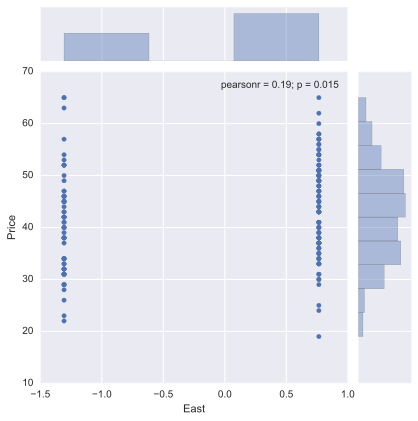

In [100]:
sns.jointplot("East", "Price", data=df)

In [200]:
# East 의 P-value = 0.03 이므로 유의수준 1% 대비 높기 때문에 의미는 있음(0이 아님)
# 추가 프리미엄 = + 3%

# 문제2

In [202]:
df20 = pd.read_csv("cars04.csv")
df20.head(1)

,Vehicle Name,Hybrid,SuggestedRetailPrice,DealerCost,EngineSize,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,WheelBase,Length,Width
0,Chevrolet Aveo 4dr,0,11690,10965,1.6,4,103,28,34,2370,98,167,66


In [203]:
df2 = df20[["EngineSize", "Cylinders", "Horsepower", "HighwayMPG", "Weight", "WheelBase", "Hybrid", "SuggestedRetailPrice"]]

In [204]:
df2.head(1)

,EngineSize,Cylinders,Horsepower,HighwayMPG,Weight,WheelBase,Hybrid,SuggestedRetailPrice
0,1.6,4,103,34,2370,98,0,11690


In [205]:
# scaling 안한 모델 작성
df1 = sm.add_constant(df2)
df1.head(1)

,const,EngineSize,Cylinders,Horsepower,HighwayMPG,Weight,WheelBase,Hybrid,SuggestedRetailPrice
0,1,1.6,4,103,34,2370,98,0,11690


In [206]:
model1 = sm.OLS(df1.ix[:,-1], df1.ix[:,:-1])

In [207]:
result1 = model1.fit()

In [208]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Mon, 13 Jun 2016   Prob (F-statistic):           5.35e-34
Time:                        01:20:00   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6964      0.443     96.448      0.0

In [209]:
# scaling 진행

In [210]:
scaler.fit(df2)
df = scaler.transform(df2)

In [211]:
df = pd.DataFrame(df, columns = ["EngineSize", "Cylinders", "Horsepower", "HighwayMPG", "Weight", "WheelBase", "Hybrid", "SuggestedRetailPrice"])

In [212]:
df.head(1)

,EngineSize,Cylinders,Horsepower,HighwayMPG,Weight,WheelBase,Hybrid,SuggestedRetailPrice
0,-1.406789,-1.033283,-1.514918,0.858604,-1.793629,-1.569017,-0.113961,-1.139786


In [213]:
df2 = sm.add_constant(df)

In [214]:
model2 = sm.OLS(df2.ix[:,-1], df2.ix[:,:-1])

In [215]:
result2 = model2.fit()

In [216]:
# Scailing한 모델 : 안한것 보다 R-Squared 값 상승 확인함
print(result2.summary())

                             OLS Regression Results                             
Dep. Variable:     SuggestedRetailPrice   R-squared:                       0.782
Model:                              OLS   Adj. R-squared:                  0.775
Method:                   Least Squares   F-statistic:                     115.7
Date:                  Mon, 13 Jun 2016   Prob (F-statistic):           4.36e-71
Time:                          01:20:09   Log-Likelihood:                -153.88
No. Observations:                   234   AIC:                             323.8
Df Residuals:                       226   BIC:                             351.4
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.518e-16      0.031

In [217]:
# Hybrid, WheelBase 제거 후 모델 다시 만들기
df3 = df2.drop(["Hybrid", "WheelBase"], axis=1)

In [218]:
model3 = sm.OLS(df3.ix[:,-1], df3.ix[:,:-1])
result3 = model3.fit()

In [220]:
print(result3.summary()) # Adj. R-squared 값 0.002 상승함...

                             OLS Regression Results                             
Dep. Variable:     SuggestedRetailPrice   R-squared:                       0.782
Model:                              OLS   Adj. R-squared:                  0.777
Method:                   Least Squares   F-statistic:                     163.4
Date:                  Mon, 13 Jun 2016   Prob (F-statistic):           2.76e-73
Time:                          01:20:42   Log-Likelihood:                -153.92
No. Observations:                   234   AIC:                             319.8
Df Residuals:                       228   BIC:                             340.6
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.518e-16      0.031

In [142]:
# R-squared가 0.8 미만이므로 나머지 data 확인

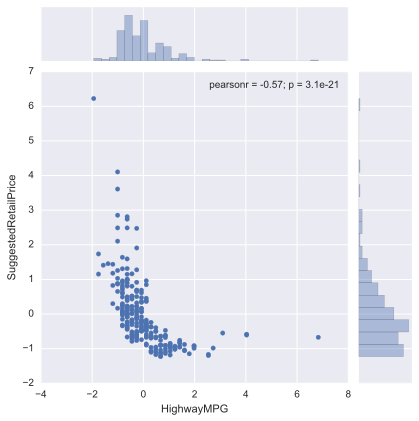

In [174]:
sns.jointplot("HighwayMPG","SuggestedRetailPrice", data = df3 )

In [170]:
# anova 확인
model4 = sm.OLS.from_formula("SuggestedRetailPrice~EngineSize+Cylinders+Horsepower+HighwayMPG+Weight", data=df3)

In [171]:
result4 = model4.fit()

In [172]:
table = sm.stats.anova_lm(result4)

In [198]:
table

,df,sum_sq,mean_sq,F,PR(>F)
EngineSize,1.0,116.076897,116.076897,518.315122,1.236719e-60
Cylinders,1.0,19.919746,19.919746,88.947120,4.850504e-18
Horsepower,1.0,38.151465,38.151465,170.356736,1.896736e-29
HighwayMPG,1.0,1.294864,1.294864,5.781923,1.699060e-02
Weight,1.0,7.496328,7.496328,33.473155,2.369802e-08
Residual,228.0,51.060699,0.223950,NaN,NaN


In [244]:
# Highway MGP 변환이 필요함... 다항회귀로 model 작성!

In [264]:
model5 = sm.OLS.from_formula("SuggestedRetailPrice~ HighwayMPG + I(HighwayMPG**2)+EngineSize+Cylinders+Horsepower+Weight+I(Weight**2)", data=df3)

In [265]:
result5 = model5.fit()

In [266]:
print(result5.summary())

                             OLS Regression Results                             
Dep. Variable:     SuggestedRetailPrice   R-squared:                       0.814
Model:                              OLS   Adj. R-squared:                  0.808
Method:                   Least Squares   F-statistic:                     141.1
Date:                  Mon, 13 Jun 2016   Prob (F-statistic):           8.27e-79
Time:                          01:31:08   Log-Likelihood:                -135.37
No. Observations:                   234   AIC:                             286.7
Df Residuals:                       226   BIC:                             314.4
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

In [267]:
# Adj. R-Squared는 맞췄으나 정규분포가 아님... 과최적화 됨